In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
all_hearts_df = pd.read_csv('all_user_hearts.csv')
print(all_hearts_df.head(5))

  USERNAME        DATE      TIME  VALUE
0      A01  2016-04-01  00:00:00     79
1      A01  2016-04-01  00:01:00     80
2      A01  2016-04-01  00:02:00     78
3      A01  2016-04-01  00:03:00     73
4      A01  2016-04-01  00:04:00     77


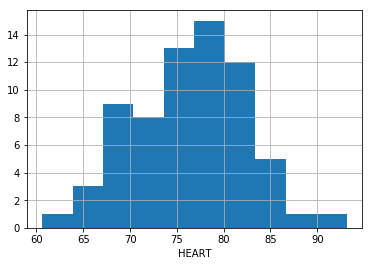

In [130]:
heart_data = all_hearts_df.groupby(["USERNAME"])["VALUE"].mean()
heart_data.hist()
plt.xlabel('HEART')
plt.show()



60 under beat : 1.47%


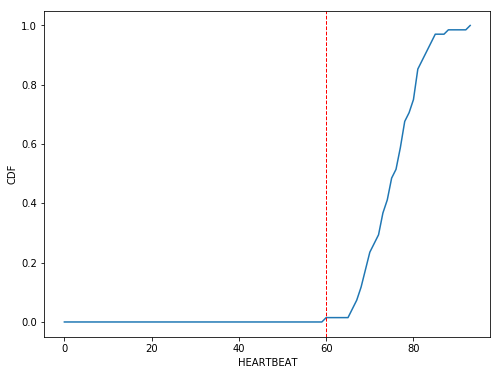

In [139]:
heart_list = [int(heart) for heart in heart_data]
heart_list_count = np.zeros(max(heart_list)+1)
for heart in heart_list:
    heart_list_count[int(heart)] += 1
heart_cumsum = heart_list_count.cumsum()
heart_cdf = [cumsum/heart_cumsum[-1] for cumsum in heart_cumsum]
print('60 under beat : {0}%'.format(round(heart_cdf[60]*100,2)))
plt.figure(figsize=(8,6))
plt.plot(heart_cdf)
plt.xlabel('HEARTBEAT')
plt.ylabel('CDF')
plt.axvline(x=60, color='r', linestyle='--', linewidth=1)
plt.show()

In [424]:
all_steps_df = pd.read_csv('all_user_steps.csv')
print(all_steps_df.head(5))

  USERNAME        DATE      TIME  HOUR  MINUTES  STEPS
0      A01  2016-04-01  00:00:00     0        0      0
1      A01  2016-04-01  00:01:00     0        1      0
2      A01  2016-04-01  00:02:00     0        2      0
3      A01  2016-04-01  00:03:00     0        3      0
4      A01  2016-04-01  00:04:00     0        4      0


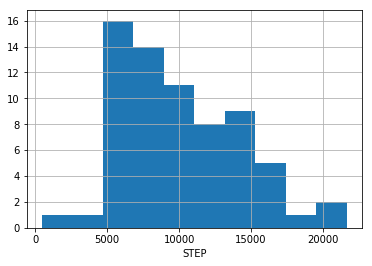

In [46]:
step_data = all_steps_df.groupby(["USERNAME", "DATE"])["STEPS"].sum().reset_index()
step_data = step_data.groupby(["USERNAME"])["STEPS"].mean()

step_data.hist()
plt.xlabel('STEP')
plt.show()



step under 10000 : 57.35%


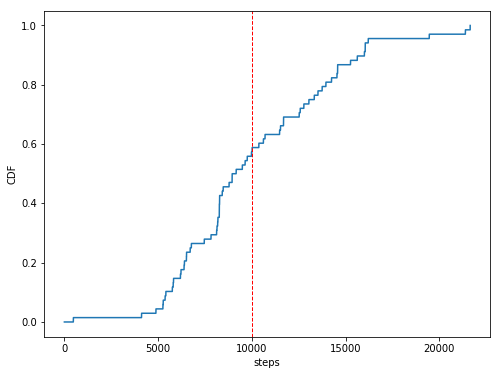

In [110]:
step_list = [int(step) for step in step_data]
step_list_count = np.zeros(max(step_list)+1)
for step in step_list:
    step_list_count[int(step)] += 1
step_cumsum = step_list_count.cumsum()
step_cdf = [cumsum/step_cumsum[-1] for cumsum in step_cumsum]
print('step under 10000 : {0}%'.format(round(step_cdf[10000]*100,2)))

plt.figure(figsize=(8,6))
plt.plot(step_cdf)
plt.xlabel('steps')
plt.ylabel('CDF')
plt.axvline(x=10000, color='r', linestyle='--', linewidth=1)
plt.show()

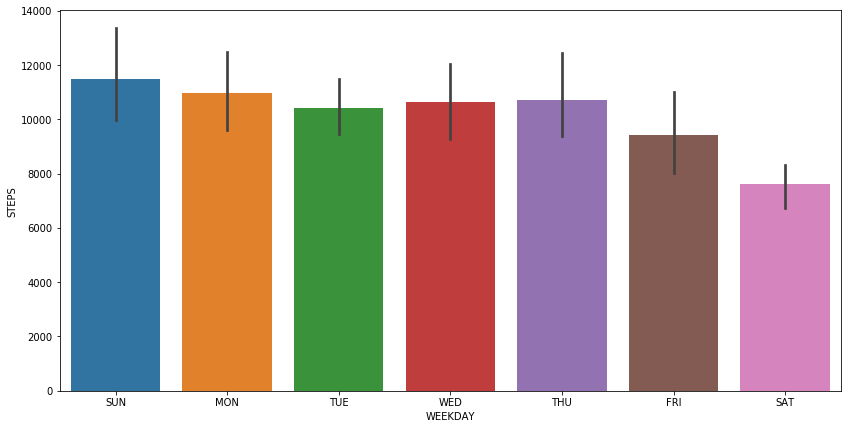

In [89]:
all_steps_df = pd.read_csv('all_user_steps.csv')


step_data = all_steps_df.groupby(["USERNAME", "DATE"])["STEPS"].sum().reset_index()
step_data = step_data.groupby(["DATE"])["STEPS"].mean().reset_index()
step_data['WEEKDAY'] = pd.to_datetime(step_data['DATE'], format='%Y-%m-%d').apply(lambda x: x.weekday())

plt.figure(figsize=(14,7))
ax = sns.barplot(x='WEEKDAY', y='STEPS', data=step_data)
plt.xticks(range(0, 7), ['SUN', 'MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT'])
plt.show()

In [500]:
all_sleeps_df = pd.read_csv('all_user_sleeps.csv')
print(all_sleeps_df.head(10))

  USERNAME        DATE STARTTIME  MINUTESASLEEP  MINUTESAWAKE  TIMEINBED
0      A01  2016-04-01  02:39:00            485            26        511
1      A01  2016-04-02  02:09:00            512            37        549
2      A01  2016-04-04  14:11:00            335            11        346
3      A01  2016-04-05  16:35:00            311            24        335
4      A01  2016-04-06  01:49:00            491            59        551
5      A01  2016-04-07  01:08:30            361            32        393
6      A01  2016-04-08  01:50:00            338             6        344
7      A01  2016-04-09  01:47:30            612            33        645
8      A01  2016-04-10  03:00:00            452            54        512
9      A01  2016-04-11  01:12:00            357            36        393


USERNAME
A01     371.357143
A010    425.311111
A016    303.900000
A017    344.612245
A018    375.869565
Name: MINUTESASLEEP, dtype: float64


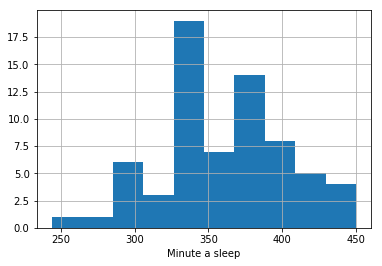

In [501]:
sleep_data = all_sleeps_df.groupby(['USERNAME','DATE'])["MINUTESASLEEP"].sum().reset_index()
sleep_data = sleep_data.groupby(["USERNAME"])["MINUTESASLEEP"].mean()
print(sleep_data.head(5))
sleep_data.hist()
plt.xlabel('Minute a sleep')
plt.show()



하루 수면 시간이 6시간이 안되는 경우 : 48.53%


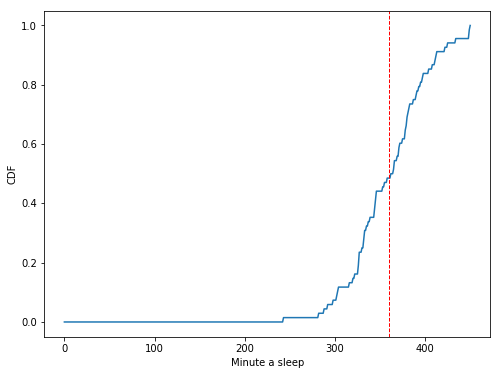

In [502]:
sleep_list = [int(sleep) for sleep in sleep_data]
sleep_list_count = np.zeros(max(sleep_list)+1)
for sleep in sleep_list:
    sleep_list_count[int(sleep)] += 1
sleep_cumsum = sleep_list_count.cumsum()
sleep_cdf = [cumsum/sleep_cumsum[-1] for cumsum in sleep_cumsum]
print('하루 수면 시간이 6시간이 안되는 경우 : {0}%'.format(round(sleep_cdf[360]*100,2)))
plt.figure(figsize=(8,6))
plt.plot(sleep_cdf)
plt.axvline(x=360, color='r', linestyle='--', linewidth=1)
plt.xlabel('Minute a sleep')
plt.ylabel('CDF')
plt.show()

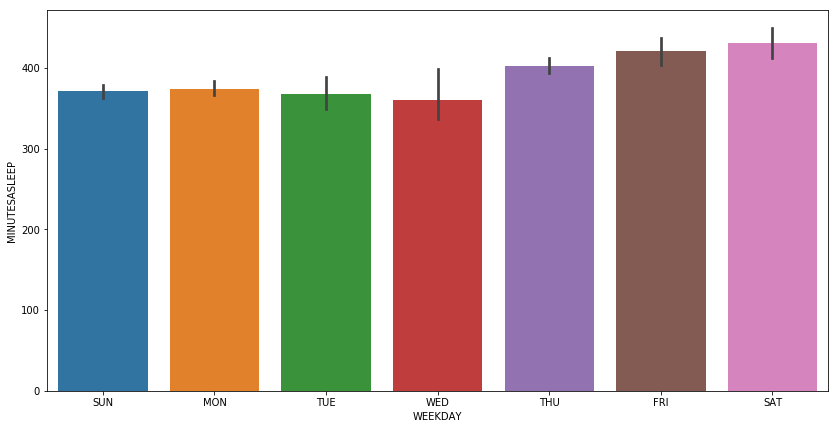

In [88]:
all_sleeps_df = pd.read_csv('all_user_sleeps.csv')


sleep_data = all_sleeps_df.groupby(["USERNAME", "DATE"])["MINUTESASLEEP"].sum().reset_index()
sleep_data = sleep_data.groupby(["DATE"])["MINUTESASLEEP"].mean().reset_index()
sleep_data['WEEKDAY'] = pd.to_datetime(step_data['DATE'], format='%Y-%m-%d').apply(lambda x: x.weekday())

plt.figure(figsize=(14,7))
ax = sns.barplot(x='WEEKDAY', y='MINUTESASLEEP', data=sleep_data)
plt.xticks(range(0, 7), ['SUN', 'MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT'])
plt.show()

In [92]:
weather = pd.read_csv('sokulee_weather.csv')
weather = weather.fillna(0)
print(weather.head(5))

   STATION          DATETIME  TEMPERATURE  RAINFALL  WINDSPEED  HUMIDITY
0      133  2016-04-01 00:00         10.8       0.0        0.0        38
1      133  2016-04-01 01:00          9.5       0.0        0.1        49
2      133  2016-04-01 02:00          8.6       0.0        0.3        49
3      133  2016-04-01 03:00          7.8       0.0        1.1        52
4      133  2016-04-01 04:00          6.5       0.0        0.1        60


In [119]:
weather['DATETIME'] = pd.to_datetime(weather['DATETIME']).dt.date
top_temper = weather.groupby(["DATETIME"])["TEMPERATURE"].max().reset_index()
print(top_temper.head(5))

     DATETIME  TEMPERATURE
0  2016-04-01         24.9
1  2016-04-02         24.1
2  2016-04-03         16.3
3  2016-04-04         18.0
4  2016-04-05         20.5


In [149]:
all_steps_df = pd.read_csv('all_user_steps.csv')
print(all_steps_df.head(5))

  USERNAME        DATE      TIME  HOUR  MINUTES  STEPS
0      A01  2016-04-01  00:00:00     0        0      0
1      A01  2016-04-01  00:01:00     0        1      0
2      A01  2016-04-01  00:02:00     0        2      0
3      A01  2016-04-01  00:03:00     0        3      0
4      A01  2016-04-01  00:04:00     0        4      0


In [157]:
step_data = all_steps_df.groupby(["USERNAME","DATE"])["STEPS"].sum().reset_index()
step_data = step_data.groupby(["DATE"])["STEPS"].mean().reset_index()
print(step_data.head(5))

         DATE         STEPS
0  2016-04-01  11632.500000
1  2016-04-02  10662.938462
2  2016-04-03   7870.104478
3  2016-04-04  16206.477612
4  2016-04-05  13893.089552


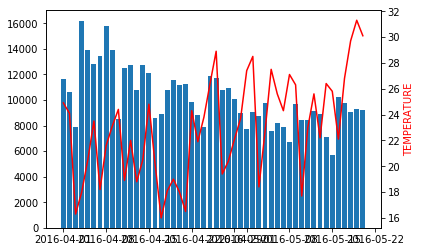

In [210]:
plt.bar(top_temper['DATETIME'], step_data['STEPS'])
ax2 = plt.twinx()

ax2.plot(top_temper['DATETIME'], top_temper['TEMPERATURE'], 'r-')
ax2.set_xlabel('DATE')
ax2.set_ylabel('TEMPERATURE', color='r')

plt.show()

In [212]:
rain = weather.groupby(["DATETIME"])["RAINFALL"].sum().reset_index()

print(rain.head(5))

    DATETIME  RAINFALL
0 2016-04-01       0.0
1 2016-04-02       0.0
2 2016-04-03       2.5
3 2016-04-04       0.0
4 2016-04-05       0.0


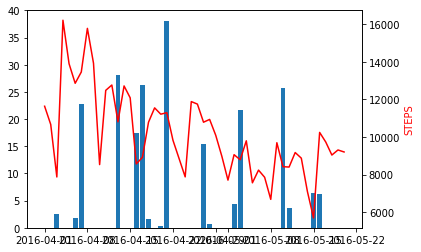

In [268]:
plt.bar(rain['DATETIME'], rain['RAINFALL'])

ax2 = plt.twinx()
ax2.plot(rain['DATETIME'], step_data['STEPS'], 'r-')
ax2.set_xlabel('DATE')
ax2.set_ylabel('STEPS', color='r')

plt.show()

In [245]:
all_hearts_df = pd.read_csv('all_user_hearts.csv')

         DATE USERNAME  VALUE
0  2016-04-01      A01   1148
1  2016-04-01     A010   1366
2  2016-04-01     A016   1355
3  2016-04-01     A017   1395
4  2016-04-01     A018   1376
5  2016-04-01      A02   1296
6  2016-04-01     A020   1392
7  2016-04-01     A021   1406
8  2016-04-01     A022   1406
9  2016-04-01     A024   1420


In [250]:
heart_data = all_hearts_df.groupby(['DATE', 'USERNAME'])['VALUE'].count().reset_index()
heart_data = heart_data.groupby(['DATE'])['USERNAME'].count().reset_index()

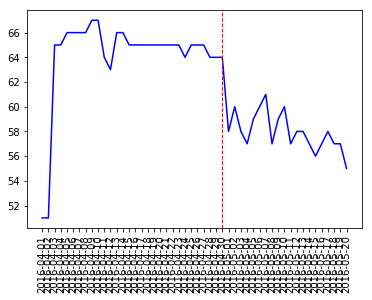

In [261]:
plt.plot(heart_data['DATE'], heart_data['USERNAME'], 'b-')
plt.xticks(heart_data['DATE'], rotation=90)
plt.axvline(x='2016-04-30', color='r', linestyle='--', linewidth=1)
plt.show()

In [304]:
weather = pd.read_csv('sokulee_weather.csv')
weather = weather.fillna(0)
del weather['STATION']
weather['DATETIME'] = pd.to_datetime(weather['DATETIME']).dt.weekday
weather = weather.groupby('DATETIME').mean().reset_index()
weather.columns = weather.columns.str.replace('DATETIME','DATE')
print(weather.head(5))

   DATE  TEMPERATURE  RAINFALL  WINDSPEED   HUMIDITY
0     0    16.072619  0.073810   1.871429  61.089286
1     1    15.442262  0.282143   1.892262  61.428571
2     2    15.788095  0.293452   1.782143  65.541667
3     3    16.729762  0.366071   1.474405  71.130952
4     4    17.237500  0.000000   1.696354  62.083333


In [307]:
all_steps_df = pd.read_csv('all_user_steps.csv')
step_data = all_steps_df.groupby(['DATE', 'USERNAME'])['STEPS'].sum().reset_index()
step_data = step_data.groupby(['DATE'])['STEPS'].mean().reset_index()
step_data['DATE'] = pd.to_datetime(step_data['DATE']).dt.weekday


data = pd.merge(weather, step_data)
data.columns = data.columns.str.replace('DATE','WEEKDAY')
print(data.head(5))

   WEEKDAY  TEMPERATURE  RAINFALL  WINDSPEED   HUMIDITY         STEPS
0        0    16.072619   0.07381   1.871429  61.089286  16206.477612
1        0    16.072619   0.07381   1.871429  61.089286  12477.223881
2        0    16.072619   0.07381   1.871429  61.089286  10781.985075
3        0    16.072619   0.07381   1.871429  61.089286  11879.656716
4        0    16.072619   0.07381   1.871429  61.089286   9056.308824


In [308]:
all_sleeps_df = pd.read_csv('all_user_sleeps.csv')
print(all_sleeps_df.head(5))

  USERNAME        DATE STARTTIME  MINUTESASLEEP  MINUTESAWAKE  TIMEINBED
0      A01  2016-04-01  02:39:00            485            26        511
1      A01  2016-04-02  02:09:00            512            37        549
2      A01  2016-04-04  01:52:30            335            11        346
3      A01  2016-04-04  14:11:00             89             1         90
4      A01  2016-04-05  02:04:00            311            24        335


In [321]:
sleep_data = all_sleeps_df.groupby(['DATE', 'USERNAME'])['MINUTESASLEEP'].sum().reset_index()
sleep_data = sleep_data.groupby(['DATE'])['MINUTESASLEEP'].mean().reset_index()
sleep_data['DATE'] = pd.to_datetime(sleep_data['DATE']).dt.weekday
sleep_data.columns = sleep_data.columns.str.replace('DATE','WEEKDAY')


data = pd.merge(data, sleep_data)
print(data.head(5))

   WEEKDAY  TEMPERATURE  RAINFALL  WINDSPEED   HUMIDITY         STEPS  \
0        0    16.072619   0.07381   1.871429  61.089286  16206.477612   
1        0    16.072619   0.07381   1.871429  61.089286  12477.223881   
2        0    16.072619   0.07381   1.871429  61.089286  10781.985075   
3        0    16.072619   0.07381   1.871429  61.089286  11879.656716   
4        0    16.072619   0.07381   1.871429  61.089286   9056.308824   

   MINUTESASLEEP  
0     376.568966  
1     376.568966  
2     376.568966  
3     376.568966  
4     376.568966  


/Users/lsg/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


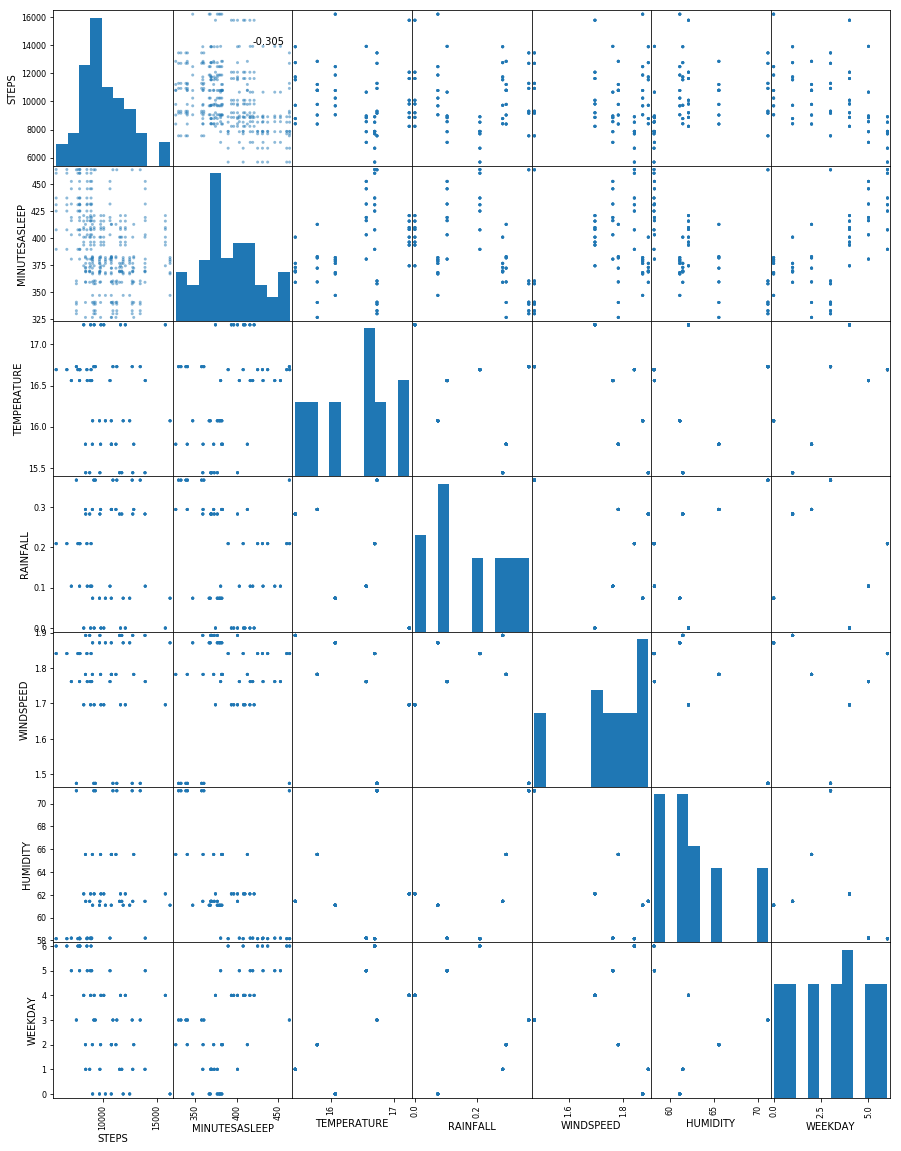

In [322]:
df_subset = data[['STEPS', 'MINUTESASLEEP', 'TEMPERATURE', 'RAINFALL', 'WINDSPEED', 'HUMIDITY', 'WEEKDAY']]
axes = pd.plotting.scatter_matrix(df_subset, figsize = (15,20), alpha=0.5)
corr = df_subset.corr().as_matrix()
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
    plt.show()